NumPy Boolean Logic & Masking Mini-Project: "Analyzing Weather Data"
In this project, we will use NumPy's boolean logic, comparisons, and masking to analyze a weather dataset containing daily temperatures (°C) for a fictional city over one year (365 days).

We will:
✅ Find extreme temperatures (hot/cold days).
✅ Count days with specific temperature ranges.
✅ Replace missing/corrupt data.
✅ Identify heatwaves & cold spells.
✅ Visualize temperature trends using matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random temperature data for a year (365 days)
np.random.seed(42)  # For reproducibility
temps = np.random.normal(loc=25, scale=10, size=365)  # Mean=25°C, Std=10°C

# Simulate some missing/corrupt data (set ~5% of values to NaN)
corrupt_indices = np.random.choice(365, size=int(0.05 * 365), replace=False)
temps[corrupt_indices] = np.nan  # Set 5% of values to NaN

# Print first few values
print(temps[:10])  # See a sample of data

[29.96714153 23.61735699 31.47688538 40.23029856 22.65846625 22.65863043
 40.79212816 32.67434729 20.30525614 30.42560044]


In [2]:
# Replace NaN values with the mean temperature (ignoring NaNs)
mean_temp = np.nanmean(temps)  # Mean ignoring NaNs
temps[np.isnan(temps)] = mean_temp  # Replace NaNs

# Verify
print("Missing values:", np.sum(np.isnan(temps)))  # Should print 0

Missing values: 0


In [3]:
# Find extreme days
hot_days = temps[temps > 35]
cold_days = temps[temps < 10]

# Print results
print(f"Number of hot days (>35°C): {len(hot_days)}")
print(f"Number of cold days (<10°C): {len(cold_days)}")

Number of hot days (>35°C): 40
Number of cold days (<10°C): 16


In [4]:
# Find indices where temperature is above 35°C
hot_indices = np.where(temps > 35)[0]

# Check for consecutive days
heatwaves = np.split(hot_indices, np.where(np.diff(hot_indices) > 1)[0] + 1)
heatwaves = [hw for hw in heatwaves if len(hw) >= 3]  # Only keep heatwaves of 3+ days

# Find cold spells similarly
cold_indices = np.where(temps < 10)[0]
cold_spells = np.split(cold_indices, np.where(np.diff(cold_indices) > 1)[0] + 1)
cold_spells = [cs for cs in cold_spells if len(cs) >= 3]

print(f"Number of heatwaves: {len(heatwaves)}")
print(f"Number of cold spells: {len(cold_spells)}")

Number of heatwaves: 0
Number of cold spells: 0


In [5]:
# Split into 12 months (assuming 365 days for simplicity)
months = np.array_split(temps, 12)

# Calculate average temperature per month
monthly_avg = np.array([np.mean(month) for month in months])

# Print results
print("Monthly Average Temperatures:", monthly_avg)

Monthly Average Temperatures: [23.53515658 23.20826774 25.33856746 24.21768996 24.55685304 26.90509879
 27.17048559 24.45173499 22.86353543 25.17224522 28.06108361 24.15964467]


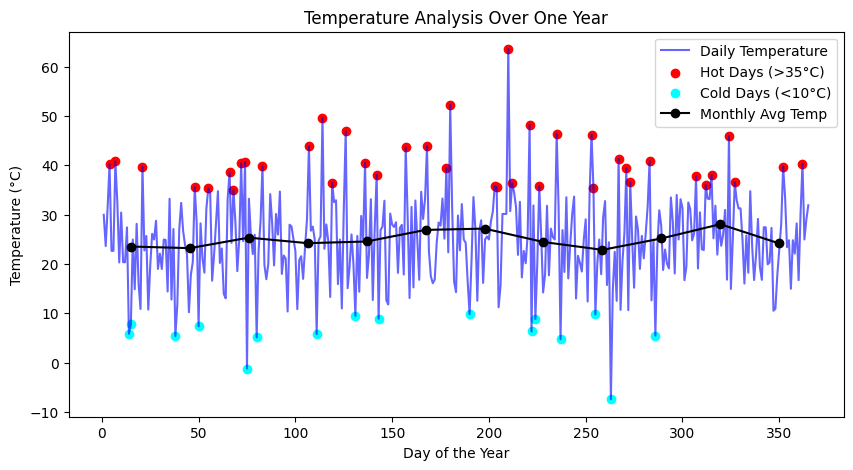

In [6]:
# Days of the year
days = np.arange(1, 366)

plt.figure(figsize=(10,5))

# Plot temperature trend
plt.plot(days, temps, label="Daily Temperature", color='blue', alpha=0.6)

# Highlight hot and cold days
plt.scatter(days[temps > 35], temps[temps > 35], color='red', label="Hot Days (>35°C)")
plt.scatter(days[temps < 10], temps[temps < 10], color='cyan', label="Cold Days (<10°C)")

# Plot monthly averages
month_days = np.linspace(15, 350, 12)  # Approx. middle of each month
plt.plot(month_days, monthly_avg, 'ko-', label="Monthly Avg Temp")  # 'k' = black circles

# Labels & legend
plt.xlabel("Day of the Year")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Analysis Over One Year")
plt.legend()
plt.show()